<a href="https://colab.research.google.com/github/avoss22/NGG6050/blob/main/QuantNeuro_Homework_3_Binomial_Distribution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QuantNeuro Homework 3: Binomial Distribution

## Anna Voss

## 9-10-23

Tutorial Binomial Distribution:

In [1]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

In [2]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')



695 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6950


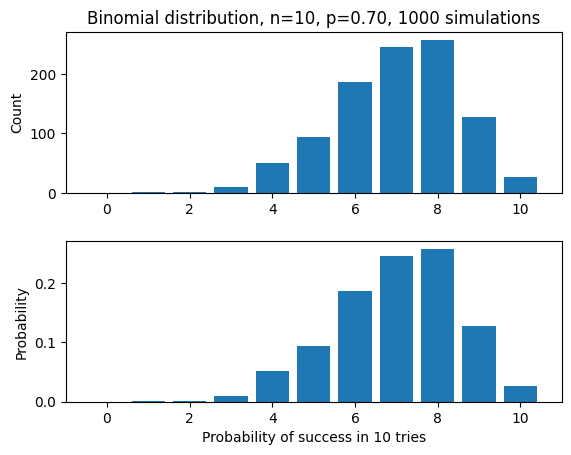

In [5]:
# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, then the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

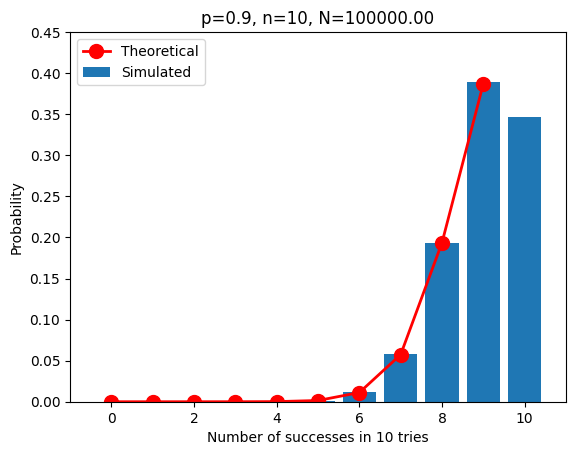

In [6]:
# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)

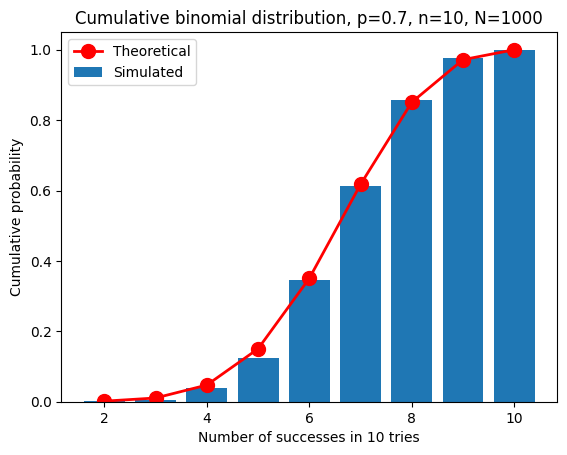

In [7]:
# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

# Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [9]:
 # Number of quanta available
n = 10

# Probability of releasing a single quantum
p = 0.2

# Calculate the probabilities for 0 to 10 quanta being released (k)
probabilities = [st.binom.pmf(k, n, p) for k in range(11)]

# Print the probabilities
for k, probability in enumerate(probabilities):
    print(f"Probability of {k} quanta being released: {probability:.4f}")

Probability of 0 quanta being released: 0.1074
Probability of 1 quanta being released: 0.2684
Probability of 2 quanta being released: 0.3020
Probability of 3 quanta being released: 0.2013
Probability of 4 quanta being released: 0.0881
Probability of 5 quanta being released: 0.0264
Probability of 6 quanta being released: 0.0055
Probability of 7 quanta being released: 0.0008
Probability of 8 quanta being released: 0.0001
Probability of 9 quanta being released: 0.0000
Probability of 10 quanta being released: 0.0000


# Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

In [13]:
# Number of quanta available
n = 14

# Observed number of quanta released
released_quanta = 8

# Candidate release probabilities
release_probabilities = np.arange(0, 1, 0.1)

# Calculate the probabilities for each candidate release probability
probabilities_given_p = [] #Start with an empty vector

for p in release_probabilities:
    # Probability of observing 8 quanta released
    probability = st.binom.pmf(released_quanta, n, p)
    probabilities_given_p.append(probability) #Add to our empty vector

# Determine the most probable true release probability
most_probable_p = release_probabilities[probabilities_given_p.index(max(probabilities_given_p))] #index returns a singular value (here we want the max)

# Print the probabilities and the most probable true release probability
for i, p in enumerate(release_probabilities):
    print(f"True release probability: {p:.1f}, Probability of observing {released_quanta} quanta released: {probabilities_given_p[i]:.4f}")

print(f"The most probable true release probability is: {most_probable_p:.1f}") #"insert the value of p, formatted as a floating-point number with one decimal place."


True release probability: 0.0, Probability of observing 8 quanta released: 0.0000
True release probability: 0.1, Probability of observing 8 quanta released: 0.0000
True release probability: 0.2, Probability of observing 8 quanta released: 0.0020
True release probability: 0.3, Probability of observing 8 quanta released: 0.0232
True release probability: 0.4, Probability of observing 8 quanta released: 0.0918
True release probability: 0.5, Probability of observing 8 quanta released: 0.1833
True release probability: 0.6, Probability of observing 8 quanta released: 0.2066
True release probability: 0.7, Probability of observing 8 quanta released: 0.1262
True release probability: 0.8, Probability of observing 8 quanta released: 0.0322
True release probability: 0.9, Probability of observing 8 quanta released: 0.0013
The most probable true release probability is: 0.6


#Exercise 3
Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?


In [16]:
# Number of quanta available for release
n = 14

# True release probability
true_p = 0.1

# Observed number of quanta released in each experiment
observed_quanta_1 = 8
observed_quanta_2 = 5

# Calculate the likelihood for each measurement
likelihood_1 = st.binom.pmf(observed_quanta_1, n, true_p)
likelihood_2 = st.binom.pmf(observed_quanta_2, n, true_p)

# Calculate the total likelihood (product of individual likelihoods)
total_likelihood = likelihood_1 * likelihood_2

# Calculate the log-likelihood for each measurement
log_likelihood_1 = np.log(likelihood_1)
log_likelihood_2 = np.log(likelihood_2)

# Calculate the total log-likelihood (sum of individual log-likelihoods)
total_log_likelihood = log_likelihood_1 + log_likelihood_2

# Print the results
print(f"Total Likelihood: {total_likelihood:.8f}")
print(f"Total Log-Likelihood: {total_log_likelihood:.6f}")

Total Likelihood: 0.00000012
Total Log-Likelihood: -15.904745


I struggled with the interpretation of the total log-likelihood here. I used ChatGPT to help me with the code because I am unclear why log-likelihood ismore informative and why don't we use the -log-likelihood?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [31]:
# Number of quanta available for release
n = 14

# Candidate release probabilities
release_probabilities = np.arange(0, 1, 0.1)

# Observed number of quanta released in each experiment
observed_quanta_1 = 8
observed_quanta_2 = 5

# Calculate the probabilities for each candidate release probability for each experiment
total_likelihoods = []
total_log_likelihoods = []

# Calculate the likelihood for experiment
for p in release_probabilities:
  likelihood_1 = st.binom.pmf(observed_quanta_1, n, p)
  likelihood_2 = st.binom.pmf(observed_quanta_2, n, p)
  # Calculate the total likelihood (product of individual likelihoods)
  total_likelihood = likelihood_1 * likelihood_2
  # Calculate the log-likelihood for experiment
  log_likelihood_1 = np.log(likelihood_1)
  log_likelihood_2 = np.log(likelihood_2)
  # Calculate the total log-likelihood (sum of individual log-likelihoods)
  total_log_likelihood = log_likelihood_1 + log_likelihood_2
  #Append to our empty vector
  total_likelihoods.append(total_likelihood)
  total_log_likelihoods.append(total_log_likelihood)

# Determine the most probable true release probability
max_value = max(total_likelihoods)
#What probability produced the above likelihood?
max_likelihood_probability = total_likelihoods.index(max_value)
#Correspond this index to release probabilities
max_release_probability_likelihood = release_probabilities[max_likelihood_probability]

# Repeat above step for log-likelihood
max_log_value = max(total_log_likelihoods)
#What probability produced the above likelihood?
max_log_likelihood_probability = total_log_likelihoods.index(max_log_value)
#Correspond this index to release probabilities
max_release_probability_log_likelihood = release_probabilities[max_log_likelihood_probability]

# Print the results
print(f"Maximum Likelihood: {max_value:.6f} at Release Probability: {max_release_probability_likelihood:.3f}")
print(f"Maximum Log-Likelihood: {max_log_value:.6f} at Release Probability: {max_release_probability_log_likelihood:.3f}")


Maximum Likelihood: 0.022396 at Release Probability: 0.500
Maximum Log-Likelihood: -3.798852 at Release Probability: 0.500


<ipython-input-31-6f472ec5089a>:22: RuntimeWarning: divide by zero encountered in log
  log_likelihood_1 = np.log(likelihood_1)
<ipython-input-31-6f472ec5089a>:23: RuntimeWarning: divide by zero encountered in log
  log_likelihood_2 = np.log(likelihood_2)


Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

Computing at a higher resolution and increasing the sample size allows you to decrease effects of variability and thus gain an estimate more representative of the true probability/likelihood.

# Exercise 4
You keep going and conduct 100 separate experiments and end up with these results:
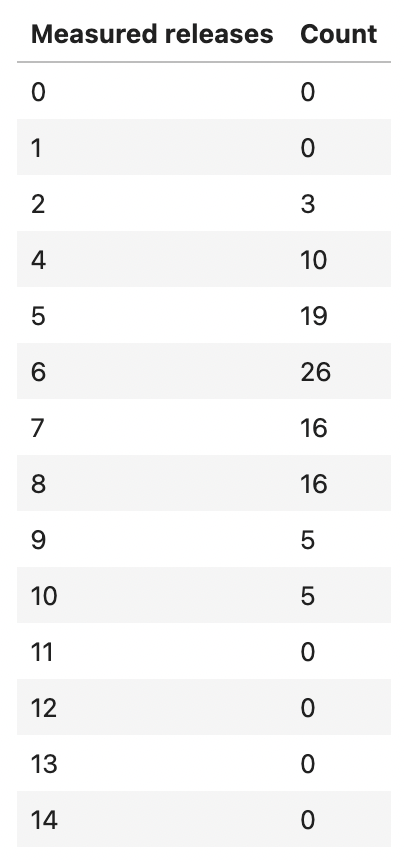

What is the most likely value of p (which we typically refer to as "p-hat") and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

In [39]:
data = {
    0: 0,
    1: 0,
    2: 3,
    4: 10,
    5: 19,
    6: 26,
    7: 16,
    8: 16,
    9: 5,
    10: 5,
    11: 0,
    12: 0,
    13: 0,
    14: 0,
}

# Number of quanta available for release
n = 14

# List of candidate true release probabilities (resolution of 0.01)
release_probabilities = np.arange(0, 1, 0.01)

# Initialize an array to store the likelihood for each release probability
likelihoods = []

#Shoutout ChatGPT for this one
for true_p in release_probabilities:
    likelihood = 1.0  # Initialize likelihood for this p

    # Calculate the likelihood for each measurement based on the data
    for observed_quanta, count in data.items():
        likelihood *= st.binom.pmf(observed_quanta, n, true_p) ** count

    likelihoods.append(likelihood)

# Find the maximum likelihood and corresponding release probability
max_likelihood = max(likelihoods)
max_likelihood_index = likelihoods.index(max_likelihood)
best_release_probability = release_probabilities[max_likelihood_index]

# Print the result
print(f"Most Likely Release Probability (p-hat): {best_release_probability:.2f}")

Most Likely Release Probability (p-hat): 0.45


# Exercise 5
Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute p hat. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [40]:
# Number of quanta available for release
n = 14

# Observed number of quanta released in the new measurement
observed_quanta = 7

release_probabilities = np.arange(0, 1.0, 0.1)

# Initialize an array to store the likelihood for each release probability
likelihoods = []

# Calculate the likelihood for each candidate release probability
for true_p in release_probabilities:
    likelihood = st.binom.pmf(observed_quanta, n, true_p)
    likelihoods.append(likelihood)

# Find the maximum likelihood and corresponding release probability
max_likelihood = max(likelihoods)
max_likelihood_index = likelihoods.index(max_likelihood)
best_release_probability = release_probabilities[max_likelihood_index]

# Print the result
print(f"Maximum Likelihood Release Probability (p-hat): {best_release_probability:.2f}")


Maximum Likelihood Release Probability (p-hat): 0.50


In [41]:
# Number of quanta available for release
n = 14

# Observed number of quanta released
observed_quanta = 7

# True release probability under the null hypothesis (H0)
null_hypothesis_p = 0.3

# Calculate the probability of observing the result under the null hypothesis
null_hypothesis_probability = st.binom.pmf(observed_quanta, n, null_hypothesis_p)

# Print the result
print(f"Probability of observing {observed_quanta} quanta released under the null hypothesis: {null_hypothesis_probability:.4f}")


Probability of observing 7 quanta released under the null hypothesis: 0.0618


With a p value of 0.0618 and an alpha level of 0.05, I would fail to reject the null hypothesis and conclude that temperature does not have an effect on release probability.